# Las cianobacterias que contaban hasta diez

En este Notebook de Python podemos jugar con unos modelos sencillos de producción de HetR en cianobacterias.

Primero tenemos que cargar las librerías necesarias:

In [8]:
import matplotlib.pyplot as plt
import numpy as np

Si llamamos $R_n$ a la cantidad de HetR que hay en una célula en el tiempo $n$, entonces podemos decir que $R_{n+1}=aR_n$, donde $a$ es un número positivo. La solución de esta recurrencia es $R_n=a^nR_0$, donde $R_0$ es la cantidad inicial de HetR en la célula.

Esta ecuación es la del crecimiento exponencial: cuando $R_{n+1}$ es proporcional a $R_n$, cada vez se crea más y más HetR, y el crecimiento se hace más y más rápido. Lo puedes ver bien en la siguiente figura, que representa la solución de la ecuación (usando $a=1.5, R_0=1$):

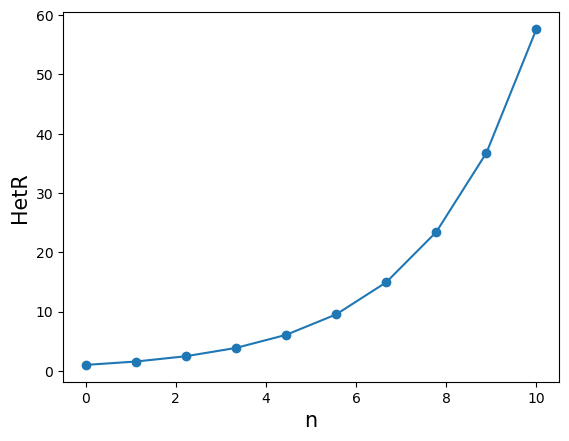

In [2]:
def HetR(n, a, R0):
    return a**n*R0

N=np.linspace(0,10,10)
a=1.5
R0=1
R=HetR(N,a,R0)

fig=plt.figure()
ax=plt.gca()
ax.plot(N,R,'o-')
ax.set_ylabel('HetR', fontsize=15)
ax.set_xlabel('n', fontsize=15);

Para evitar que una célula se vuelva loca y se convierta en heterociste por error si produce un poco de HetR de más sin querer, las células tienen un mecanismo de control. HetR, además de favorecer su propia producción, favorece la producción de PatS, que frena la producción de HetR.

En términos matemáticos, lo que tenemos ahora son dos recurrencias acopladas: la cantidad de HetR que vamos a tener en el tiempo $n+1$ ahora está afectada también por la abundancia de PatS en el tiempo $n$, que vamos a llamar $S_n$. Y la cantidad de PatS que se va a producir en el tiempo $n+1$ tiene que ver con cuánto HetR hay en el tiempo $n$, y por simplificar vamos a asumir también que en ausencia de HetR, la producción de PatS se hace naturalmente más pequeña. Las ecuaciones son

$R_{n+1}=aR_n-bS_n$

$S_{n+1}=cR_n-dS_n$

Este sistema de recurrencias también tiene solución explícita (el truco es despejar $S_n$ en la primera ecuación, y luego sustituirlo en la segunda), pero en vez de escribirla vamos a ver cómo se comportan las soluciones (hemos usado $a=1.5, b=1, c=1.1, d=1, R_0=1, S_0=0$):

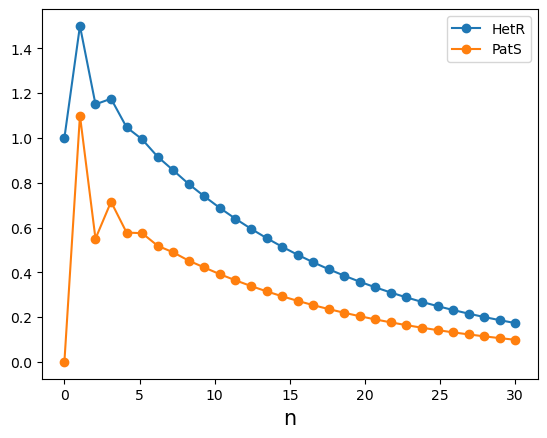

In [4]:
def HetRPatS(R,S,a,b,c,d):
    Rn=a*R-b*S
    Sn=c*R-d*S
    return Rn, Sn

N=np.linspace(0,30,30)
a=1.5
b=1
c=1.1
d=1
R0=1
S0=0
R=[R0]
S=[S0]
for n in N[:-1]:
    Rn,Sn=HetRPatS(R[-1],S[-1],a,b,c,d)
    R.append(Rn)
    S.append(Sn)

fig=plt.figure()
ax=plt.gca()
ax.plot(N,R,'o-',label='HetR')
ax.plot(N,S,'o-',label='PatS')
ax.legend()
ax.set_xlabel('n', fontsize=15);

Como vemos, la curva azul (HetR) crece un poco al principio, lo que hace que la curva naranja (PatS) crezca a su vez. Cuando PatS alcanza un valor suficientemente alto, HetR empieza a caer, lo que a su vez provoca que PatS caiga, y las dos acaban alcanzando un valor constante. Pero si la tasa de producción de HetR (la constante a) es muy alta, PatS no es capaz de frenar a HetR, y volvemos a tener crecimiento exponencial (por ejemplo, cambiando $a=2$):

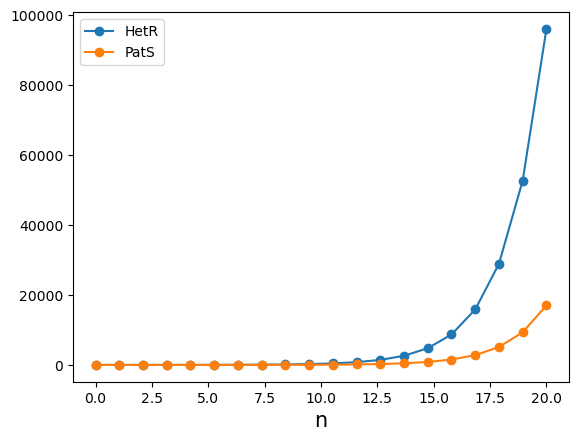

In [5]:
N=np.linspace(0,20,20)
a=2
b=1
c=0.5
d=1
R0=1
S0=0
R=[R0]
S=[S0]
for n in N[:-1]:
    Rn,Sn=HetRPatS(R[-1],S[-1],a,b,c,d)
    R.append(Rn)
    S.append(Sn)

fig=plt.figure()
ax=plt.gca()
ax.plot(N,R,'o-',label='HetR')
ax.plot(N,S,'o-',label='PatS')
ax.legend()
ax.set_xlabel('n', fontsize=15);

A continuación puedes jugar con distintos valores de los parámetros para ver cómo cambia la evolución del sistema. En las carreras de matemáticas y física y similares aprenderás a intepretar estos sistemas y a predecir cómo se van a comportar al cambiar los parámetros. Cambia los valores de las variables $a,b,c,d$ a mano y ejecuta la celda para ver qué ocurre:

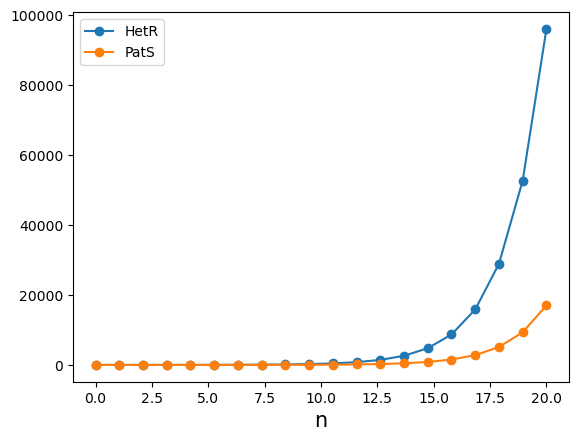

In [7]:
#PARÁMETROS
a=2
b=1
c=0.5
d=1
R0=1
S0=0

#SIMULACIÓN
N=np.linspace(0,20,20)
R=[R0]
S=[S0]
for n in N[:-1]:
    Rn,Sn=HetRPatS(R[-1],S[-1],a,b,c,d)
    R.append(Rn)
    S.append(Sn)

fig=plt.figure()
ax=plt.gca()
ax.plot(N,R,'o-',label='HetR')
ax.plot(N,S,'o-',label='PatS')
ax.legend()
ax.set_xlabel('n', fontsize=15);